In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC

#Read in the dataset
df = pd.read_csv('data1.csv')

In [2]:
#Preprocess the dataset using get_dummies
RoomName=pd.get_dummies(df['Room_Name'])
BuildingOccupancy=pd.get_dummies(df['Building_Occupancy'])
FireSprinkler=pd.get_dummies(df['Fire_Sprinkler'], drop_first=True)
SmokeDetector=pd.get_dummies(df['Smoke_Detector'], drop_first=True)
df=pd.concat([RoomName,BuildingOccupancy,FireSprinkler,df['Room_Area'],SmokeDetector],axis=1)

In [3]:
#Preprocess the dataset using Standard Scaler
Y=df[1]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop(1,axis=1))
scaled_features=scaler.transform(df.drop(1, axis=1))
scaled_features
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df=df_feat

In [4]:
#Split the dataset to test and train data
from sklearn.cross_validation import train_test_split

X=df
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
#Fit the training data to the SVM classifier algorithm and produce classification prediction of the test data
model = SVC()
model.fit(X_train,Y_train)

predictions = model.predict(X_test)


In [6]:
#Confusion matrix and Classification report of the SVM classifier
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(Y_test,predictions))
print('\n')
print(classification_report(Y_test,predictions))

[[39  5]
 [ 2 53]]


             precision    recall  f1-score   support

          0       0.95      0.89      0.92        44
          1       0.91      0.96      0.94        55

avg / total       0.93      0.93      0.93        99



In [7]:
#Check for best C and Gamma parameters that would maximize the score
from sklearn.grid_search import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,Y_train)

grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)

/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ..................... C=1000, gamma=0.01, score=0.896104 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=1.000000 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.987013 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.883117 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=1.000000 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.987013 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.883117 -   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [9]:
#Confusion matrix and Classification report of the SVM classifier with updated gamma and C
print(confusion_matrix(Y_test,grid_predictions))
print('\n')
print(classification_report(Y_test,grid_predictions))

[[42  2]
 [ 3 52]]


             precision    recall  f1-score   support

          0       0.93      0.95      0.94        44
          1       0.96      0.95      0.95        55

avg / total       0.95      0.95      0.95        99



In [11]:
#list of the scores that will appended from the for loop using the mean_max_min function below
precision_list=[]
recall_list=[]
f1_score_list=[]
support_list=[]

#function to append the scores to each list
def mean_max_min(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row_data = line.split('      ')
        precision_list.append(float(row_data[2]))
        recall_list.append(float(row_data[3]))
        f1_score_list.append(float(row_data[4]))
        support_list.append(float(row_data[5]))

#loop of random state integers from 1-150 
for i in range(1,150):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=i)
    model = SVC()
    model.fit(X_train,Y_train)
    param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
    grid = GridSearchCV(SVC(),param_grid,verbose=3)
    grid.fit(X_train,Y_train)
    grid.best_params_
    grid.best_estimator_
    grid_predictions = grid.predict(X_test)
    pred_i=grid.predict(X_test)
    report = classification_report(Y_test,pred_i)
    mean_max_min(report)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ C=1, gamma=0.01, score=0.935065 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.558442 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.610390 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.883117 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.857143 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.740260 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.870130 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.532468 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ C=1, gamma=0.01, score=0.844156 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.855263 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.538462 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.565789 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.512821 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.794872 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.753247 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.842105 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.820513 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.805195 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.868421 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.858974 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[CV] ................... C=1000, gamma=0.0001, score=0.948052 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.947368 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.818182 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.831169 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.805195 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.818182 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.844156 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.766234 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[CV] ................... C=1000, gamma=0.0001, score=0.948052 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.948052 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.961039 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.818182 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.512821 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.871795 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.857143 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.868421 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.910256 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.909091 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.881579 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.857143 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.857143 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.820513 -   0.0s
[CV] C

[CV] .................... C=1000, gamma=0.001, score=0.910256 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.934211 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.910256 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.934211 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.512821 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.513158 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.807692 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.831169 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.894737 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.897436 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[CV] ................... C=1000, gamma=0.0001, score=0.987013 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=1.000000 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.896104 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.831169 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.766234 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.870130 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.844156 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.844156 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.922078 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[CV] ................... C=1000, gamma=0.0001, score=0.961039 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.870130 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.833333 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.805195 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.815789 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.871795 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.909091 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.921053 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.858974 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.807692 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.805195 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.842105 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.871795 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.818182 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.868421 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.858974 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.525641 -   0.0s
[CV] 

[CV] ................... C=1000, gamma=0.0001, score=0.947368 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.844156 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.844156 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.857143 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.857143 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.818182 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.844156 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.883117 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.513158 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.846154 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.792208 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.815789 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.858974 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.844156 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.894737 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.513158 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.897436 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.792208 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ................... C=1000, gamma=0.0001, score=0.948052 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.526316 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.526316 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.769231 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.779221 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.815789 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.871795 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.779221 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.789474 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C

[CV] ................... C=1000, gamma=0.0001, score=0.961039 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.948052 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ........................... C=1, gamma=1, score=0.820513 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.857143 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.763158 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.884615 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.818182 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.763158 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.820513 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.818182 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.779221 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.844156 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.792208 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.844156 -   0.0s
[CV] 

[CV] .................... C=1000, gamma=0.001, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.987013 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.883117 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.935065 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.766234 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.818182 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.858974 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.805195 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.789474 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.897436 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] 

[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.897436 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.896104 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.960526 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=1, gamma=0.1, score=0.881579 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.807692 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.831169 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.907895 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.525641 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.558442 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] 

[CV] ...................... C=1000, gamma=0.1, score=0.881579 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.910256 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.974026 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.855263 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.935897 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.868421 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.538462 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.538462 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.896104 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.779221 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ...................... C=1000, gamma=0.1, score=0.870130 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.921053 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.961538 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.934211 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.974359 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[CV] ................... C=1000, gamma=0.0001, score=0.961039 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ C=1, gamma=0.01, score=0.805195 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.610390 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.571429 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.558442 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.558442 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.558442 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.558442 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.558442 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.558442 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.558442 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] 

[CV] ..................... C=1000, gamma=0.01, score=0.961039 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.948052 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.857143 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.961039 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.974026 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.883117 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.961039 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.513158 -   0.0s
[CV] 

[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.961538 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.907895 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.974359 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.961039 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.894737 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.974359 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.883117 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.857143 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=0.1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.896104 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.805195 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ........................ C=1000, gamma=1, score=0.909091 -   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.750000 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.910256 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.922078 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.907895 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.948718 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.961039 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] 

[CV] ........................ C=1000, gamma=1, score=0.805195 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.909091 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.987013 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.857143 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.987013 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.922078 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.538462 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.538462 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] .................... C=1000, gamma=0.001, score=0.922078 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.894737 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.923077 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.922078 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.894737 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.513158 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.756410 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.805195 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.881579 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.820513 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.870130 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] .................... C=100, gamma=0.0001, score=0.907895 -   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.846154 -   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.766234 -   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.789474 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.897436 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.870130 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.868421 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] 

[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.831169 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.961039 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.922078 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.844156 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=1.000000 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.922078 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] 

[CV] ................... C=1000, gamma=0.0001, score=0.974359 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.974026 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.960526 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.545455 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=1, gamma=0.1, score=0.831169 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.753247 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.779221 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.831169 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.792208 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.649351 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.623377 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ........................... C=1, gamma=1, score=0.857143 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.857143 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.909091 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.857143 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.870130 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.961039 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.831169 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.844156 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.779221 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.805195 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.831169 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.512821 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ......................... C=0.1, gamma=1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.818182 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.714286 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..........

[CV] .................... C=1000, gamma=0.001, score=0.868421 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.948718 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.987013 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.868421 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.513158 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.842105 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.858974 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.870130 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.842105 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.846154 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.792208 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.828947 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] .................... C=0.1, gamma=0.0001, score=0.883117 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.846154 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.818182 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.802632 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.858974 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.883117 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=0.01, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.896104 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.896104 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ................... C=1000, gamma=0.0001, score=0.922078 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.922078 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=1, gamma=0.1, score=0.870130 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.831169 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.883117 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.844156 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.792208 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.844156 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.513158 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.884615 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.844156 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.750000 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.910256 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.844156 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.894737 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.909091 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.922078 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.833333 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.857143 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.525641 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ................... C=1000, gamma=0.0001, score=0.871795 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.948052 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.934211 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.922078 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.844156 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.857143 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.844156 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.662338 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.558442 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=1, gamma=0.1, score=0.884615 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.844156 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.907895 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.846154 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.818182 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.907895 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.525641 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.818182 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.857143 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.805195 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.857143 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ...................... C=1000, gamma=0.1, score=0.922078 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.922078 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.948052 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.961039 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.948052 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=0.01, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.526316 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.538462 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ..................... C=1000, gamma=0.01, score=0.871795 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.883117 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.986842 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.884615 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.883117 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=1.000000 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.884615 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.526316 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.807692 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.844156 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.789474 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.858974 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.896104 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.513158 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.833333 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.792208 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.792208 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.805195 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ................... C=1000, gamma=0.0001, score=0.973684 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.538462 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.538462 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.539474 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ........................ C=1, gamma=0.01, score=0.776316 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.538462 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.545455 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.539474 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.538462 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.545455 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.539474 -   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=1, gamma=0.1, score=0.844156 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.894737 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.897436 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.805195 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.842105 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.589744 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.844156 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.846154 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.896104 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.789474 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.794872 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.883117 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.815789 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.794872 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.513158 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.807692 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.935065 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.776316 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ................... C=1000, gamma=0.0001, score=0.922078 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.987013 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.974026 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.525641 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.857143 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.907895 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.897436 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.883117 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.868421 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.525641 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.532468 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.831169 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.909091 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.844156 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.883117 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.870130 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.870130 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.857143 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.818182 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.794872 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.818182 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.828947 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.858974 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.512821 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.525641 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.922078 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.948052 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.935065 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.815789 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.897436 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.818182 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.842105 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.871795 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.766234 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.815789 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] .................... C=0.1, gamma=0.0001, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.526316 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.846154 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.870130 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.881579 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.884615 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.870130 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=0.01, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.526316 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ................... C=1000, gamma=0.0001, score=0.909091 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.948052 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.857143 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.857143 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.532468 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.532468 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=1, gamma=0.1, score=0.846154 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.766234 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.855263 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.820513 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.688312 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.802632 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.538462 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.831169 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.831169 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.779221 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.870130 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.727273 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.766234 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.870130 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.855263 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.833333 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.883117 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.921053 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.820513 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.805195 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.921053 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.526316 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.807692 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.922078 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.842105 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.871795 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ........................ C=1000, gamma=1, score=0.789474 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.897436 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.909091 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.763158 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.948718 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.909091 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.776316 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.512821 -   0.0s
[CV] C

[CV] ................... C=1000, gamma=0.0001, score=0.987013 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.894737 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ C=1, gamma=0.01, score=0.870130 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.831169 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.545455 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.805195 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.802632 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.538462 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.526316 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.512821 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.857143 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.792208 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.896104 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.896104 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.883117 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.870130 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.779221 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.538462 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.538462 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] .................... C=1000, gamma=0.001, score=0.923077 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.987013 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.947368 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.923077 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.987013 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.947368 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.779221 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.896104 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.857143 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.558442 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.526316 -   0.0s
[CV] C

[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.974026 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.934211 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.948718 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.974026 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.934211 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.727273 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.828947 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.833333 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.844156 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.815789 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.884615 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.844156 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.818182 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.831169 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.883117 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.818182 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.792208 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.883117 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.766234 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.558442 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C

[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.935897 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.896104 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.973684 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.935897 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.896104 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.973684 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.844156 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.714286 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.909091 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.922078 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.831169 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.1, gamma=0.001, score=0.538462 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.538462 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.539474 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.858974 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] C=100, gamma=0.0001 .............................................
[CV] .................... C=100, gamma=0.0001, score=0.922078 -   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .................... C=100, gamma=0.0001, score=0.857143 -   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.779221 -   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.805195 -   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.753247 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.883117 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.844156 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] .................... C=1000, gamma=0.001, score=0.987179 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.883117 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.934211 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.987179 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.883117 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.934211 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.868421 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.884615 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.909091 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.828947 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.897436 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.883117 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.881579 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..........

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.538462 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.538462 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..........

[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.961538 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.948052 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.986842 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.961538 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.948052 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.986842 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.526316 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.782051 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.779221 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[CV] ................... C=1000, gamma=0.0001, score=0.881579 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.526316 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.857143 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.842105 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.525641 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.526316 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.525641 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.519481 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.545455 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.844156 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.844156 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.779221 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.883117 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.805195 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=0.01, score=0.714286 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.818182 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.857143 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .

[CV] .................... C=1000, gamma=0.001, score=0.961538 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.922078 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.947368 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.961538 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.922078 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.947368 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.532468 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.909091 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.766234 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.792208 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.922078 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.525641 -   0.0s
[CV] 

[CV] ..................... C=1000, gamma=0.01, score=0.922078 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.881579 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.974359 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.881579 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.974359 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.526316 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.769231 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.844156 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.842105 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.820513 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.870130 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.512821 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ................... C=1000, gamma=0.0001, score=0.973684 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.538462 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.538462 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.539474 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ C=1, gamma=0.01, score=0.897436 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.909091 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.868421 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.538462 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.539474 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.538462 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.532468 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.805195 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.831169 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.909091 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.818182 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.538462 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.538462 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.538462 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.896104 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.831169 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.896104 -   0.0s
[CV] C

[CV] ................... C=1000, gamma=0.0001, score=0.922078 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.907895 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.538462 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.532468 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.539474 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.538462 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.532468 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=1, gamma=0.1, score=0.870130 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.789474 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.807692 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.896104 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.815789 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.538462 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.792208 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.792208 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.753247 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.922078 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.857143 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.532468 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.526316 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.858974 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.844156 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.883117 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.500000 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.675325 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.551282 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.805195 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.500000 -   0.0s
[CV] C

[CV] ................... C=1000, gamma=0.0001, score=0.948718 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.947368 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.512821 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=1, gamma=0.1, score=0.846154 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.844156 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.868421 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.858974 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.727273 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.815789 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.564103 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.858974 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.753247 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.815789 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.884615 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.831169 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.802632 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.526316 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.525641 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.526316 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.807692 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.818182 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=0.1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.766234 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.766234 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.565789 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ................... C=1000, gamma=0.0001, score=0.935065 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.947368 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.506494 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=1, gamma=0.1, score=0.857143 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.934211 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.820513 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.844156 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.842105 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.576923 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.857143 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.909091 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.818182 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.909091 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.883117 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.552632 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.551282 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.552632 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.551282 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.545455 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.552632 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ................... C=1000, gamma=0.0001, score=0.894737 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.513158 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.743590 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.818182 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.802632 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.538462 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.545455 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.512821 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.833333 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.844156 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.894737 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.910256 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.844156 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.907895 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.923077 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.512821 -   0.0s
[CV] 

[CV] .................... C=1000, gamma=0.001, score=0.961039 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.934211 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.948718 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.961039 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.934211 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.506494 -   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.831169 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.844156 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.883117 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.883117 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=0.01, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.513158 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.512821 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.519481 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.513158 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.506494 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished


In [12]:
#print out the scores min max and mean

print('minimum precision: ',min(precision_list))
print('maximum precision: ',max(precision_list))
print('mean precision',sum(precision_list)/len(precision_list))

print('minimum recall: ',min(recall_list))
print('maximum recall: ',max(recall_list))
print('mean recall',sum(recall_list)/len(recall_list))

print('minimum F1 Score: ',min(f1_score_list))
print('maximum F1 Score: ',max(f1_score_list))
print('mean F1 Score',sum(f1_score_list)/len(f1_score_list))

print('minimum support: ',min(support_list))
print('maximum support: ',max(support_list))
print('mean support',sum(support_list)/len(support_list))

('minimum precision: ', 0.83)
('maximum precision: ', 1.0)
('mean precision', 0.9552684563758378)
('minimum recall: ', 0.79)
('maximum recall: ', 1.0)
('mean recall', 0.9548993288590596)
('minimum F1 Score: ', 0.86)
('maximum F1 Score: ', 1.0)
('mean F1 Score', 0.9546308724832213)
('minimum support: ', 39.0)
('maximum support: ', 60.0)
('mean support', 49.5)


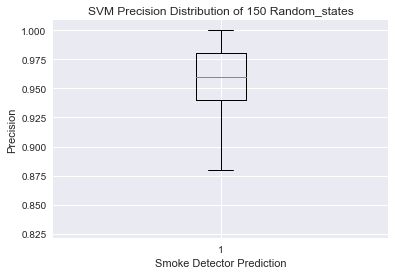

In [13]:
#visualize the precision distribution
plt.boxplot(precision_list)
plt.title('SVM Precision Distribution of 150 Random_states')
plt.xlabel('Smoke Detector Prediction')
plt.ylabel('Precision')
plt.show()